In [23]:
import twint
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
import spacy
nlp = spacy.load('en_core_web_sm')
from nltk.probability import FreqDist

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from spacy import displacy
from collections import Counter
import en_core_web_sm

In [2]:
c = twint.Config()

In [3]:
import nest_asyncio
nest_asyncio.apply()

In [4]:
from optimus import Optimus
op = Optimus()

/Users/aliciafeuling/dsc-data-science-env/projects/Capstone-Project


In [5]:
c.Search = "BLM"
c.Min_likes = 500
c.Format = "Username: {username} | Tweet: {tweet}"
c.Limit = 1
c.Pandas = True

twint.run.Search(c)

Username: MrAndyNgo | Tweet: I've been speaking w/journalists in #Kenosha who're covering the BLM riots. They've witnessed & have recorded antifa black bloc participating in organized violence using Portland-style tactics. One tells me they're pressuring black youths to participate in property destruction.
Username: MrAndyNgo | Tweet: Marauding BLM auxiliary gangs are going around Minneapolis and trying to stop independent journalists from filming in public. They steal this woman’s phone:  pic.twitter.com/oPuQGPQhL2
Username: Ikedixon4 | Tweet: Don’t blame Black folks for this. It’s a bunch of White kids who’ve hijacked BLM in pursuit of I don’t what but what they’re doing is wrong and has absolutely no place in the movement for racial and social justice.
Username: NolteNC | Tweet: Fuck #blm, #BlackLivesMatter #antifa   Fucking terrorists is all they are.   Fuck all of them.
Username: MichaelCoudrey | Tweet: Getting gas is apparently racist now, says BLM anarchists   pic.twitter.com/V8

## Putting Tweets in Dataframe

In [6]:
def available_columns():
    return twint.output.panda.Tweets_df.columns

In [7]:
def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

In [8]:
available_columns()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'hashtags', 'cashtags', 'user_id', 'user_id_str', 'username',
       'name', 'day', 'hour', 'link', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [9]:
df_pd = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes"])

In [10]:
df_pd.head()

,date,username,tweet,hashtags,nlikes
0,2020-08-25 13:49:13,MrAndyNgo,I've been speaking w/journalists in #Kenosha w...,[#kenosha],1157
1,2020-08-25 13:39:55,MrAndyNgo,Marauding BLM auxiliary gangs are going around...,[],1685
2,2020-08-25 13:17:35,Ikedixon4,Don’t blame Black folks for this. It’s a bunch...,[],1545
3,2020-08-25 13:17:04,NolteNC,"Fuck #blm, #BlackLivesMatter #antifa \n\nFucki...","[#blm, #blacklivesmatter, #antifa]",562
4,2020-08-25 13:06:25,MichaelCoudrey,"Getting gas is apparently racist now, says BLM...",[],605


### Clean tweets

In [38]:
all_sentences = []

for word in df_pd['tweet']:
    all_sentences.append(word)

lines = list()
for line in all_sentences:
    words = line.split()
    for w in words:
        lines.append(w)
print(lines)

["I've", 'been', 'speaking', 'w/journalists', 'in', '#Kenosha', "who're", 'covering', 'the', 'BLM', 'riots.', "They've", 'witnessed', '&', 'have', 'recorded', 'antifa', 'black', 'bloc', 'participating', 'in', 'organized', 'violence', 'using', 'Portland-style', 'tactics.', 'One', 'tells', 'me', "they're", 'pressuring', 'black', 'youths', 'to', 'participate', 'in', 'property', 'destruction.', 'Marauding', 'BLM', 'auxiliary', 'gangs', 'are', 'going', 'around', 'Minneapolis', 'and', 'trying', 'to', 'stop', 'independent', 'journalists', 'from', 'filming', 'in', 'public.', 'They', 'steal', 'this', 'woman’s', 'phone:', 'pic.twitter.com/oPuQGPQhL2', 'Don’t', 'blame', 'Black', 'folks', 'for', 'this.', 'It’s', 'a', 'bunch', 'of', 'White', 'kids', 'who’ve', 'hijacked', 'BLM', 'in', 'pursuit', 'of', 'I', 'don’t', 'what', 'but', 'what', 'they’re', 'doing', 'is', 'wrong', 'and', 'has', 'absolutely', 'no', 'place', 'in', 'the', 'movement', 'for', 'racial', 'and', 'social', 'justice.', 'Fuck', '#blm,'

In [39]:
# Removing Punctuation
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines_2 = []

for word in lines:
    if word != '':
        lines_2.append(word)

In [40]:
# Stemming the words to their root
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines_2:
    stem.append(s_stemmer.stem(word))
stem

['ive',
 'been',
 'speak',
 'wjournalist',
 'in',
 'kenosha',
 'whore',
 'cover',
 'the',
 'blm',
 'riot',
 'theyv',
 'wit',
 'have',
 'record',
 'antifa',
 'black',
 'bloc',
 'particip',
 'in',
 'organ',
 'violenc',
 'use',
 'portlandstyl',
 'tactic',
 'one',
 'tell',
 'me',
 'theyr',
 'pressur',
 'black',
 'youth',
 'to',
 'particip',
 'in',
 'properti',
 'destruct',
 'maraud',
 'blm',
 'auxiliari',
 'gang',
 'are',
 'go',
 'around',
 'minneapoli',
 'and',
 'tri',
 'to',
 'stop',
 'independ',
 'journalist',
 'from',
 'film',
 'in',
 'public',
 'they',
 'steal',
 'this',
 'woman',
 'phone',
 'pictwittercomopuqgpqhl2',
 'dont',
 'blame',
 'black',
 'folk',
 'for',
 'this',
 'it',
 'a',
 'bunch',
 'of',
 'white',
 'kid',
 'whove',
 'hijack',
 'blm',
 'in',
 'pursuit',
 'of',
 'i',
 'dont',
 'what',
 'but',
 'what',
 'theyr',
 'do',
 'is',
 'wrong',
 'and',
 'has',
 'absolut',
 'no',
 'place',
 'in',
 'the',
 'movement',
 'for',
 'racial',
 'and',
 'social',
 'justic',
 'fuck',
 'blm',
 

In [41]:
# Removing all stop words
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
stem2

['ive',
 'speak',
 'wjournalist',
 'kenosha',
 'whore',
 'cover',
 'blm',
 'riot',
 'theyv',
 'wit',
 'record',
 'antifa',
 'black',
 'bloc',
 'particip',
 'organ',
 'violenc',
 'use',
 'portlandstyl',
 'tactic',
 'tell',
 'theyr',
 'pressur',
 'black',
 'youth',
 'particip',
 'properti',
 'destruct',
 'maraud',
 'blm',
 'auxiliari',
 'gang',
 'minneapoli',
 'tri',
 'stop',
 'independ',
 'journalist',
 'film',
 'public',
 'steal',
 'woman',
 'phone',
 'pictwittercomopuqgpqhl2',
 'dont',
 'blame',
 'black',
 'folk',
 'bunch',
 'white',
 'kid',
 'whove',
 'hijack',
 'blm',
 'pursuit',
 'dont',
 'theyr',
 'wrong',
 'absolut',
 'place',
 'movement',
 'racial',
 'social',
 'justic',
 'fuck',
 'blm',
 'blacklivesmatt',
 'antifa',
 'fuck',
 'terrorist',
 'fuck',
 'gas',
 'appar',
 'racist',
 'blm',
 'anarchist',
 'pictwittercomv8a04mmanz',
 'milwauke',
 'brewer',
 'pitcher',
 'devin',
 'william',
 'scratch',
 'previous',
 'read',
 'bud',
 'replac',
 'blm',
 'prompt',
 'struck',
 'red',
 'orde

In [42]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [43]:
# Give the frequency of the words
freq = FreqDist()

for words in df:
    freq[words] +=1
freq

FreqDist({1: 172, 2: 29, 3: 11, 4: 4, 21: 1, 7: 1, 6: 1})

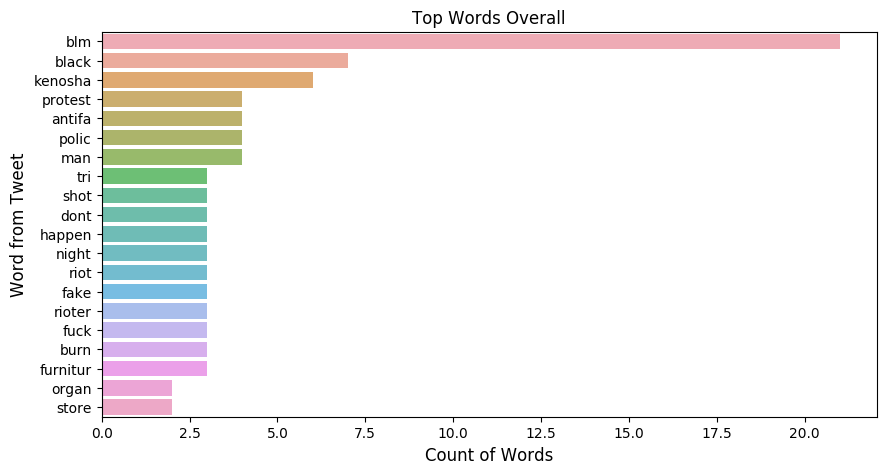

In [46]:
# Simple plot to show the top 20 words being used

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [28]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [29]:
str1 = " "
stem2 = str1.join(lines_2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

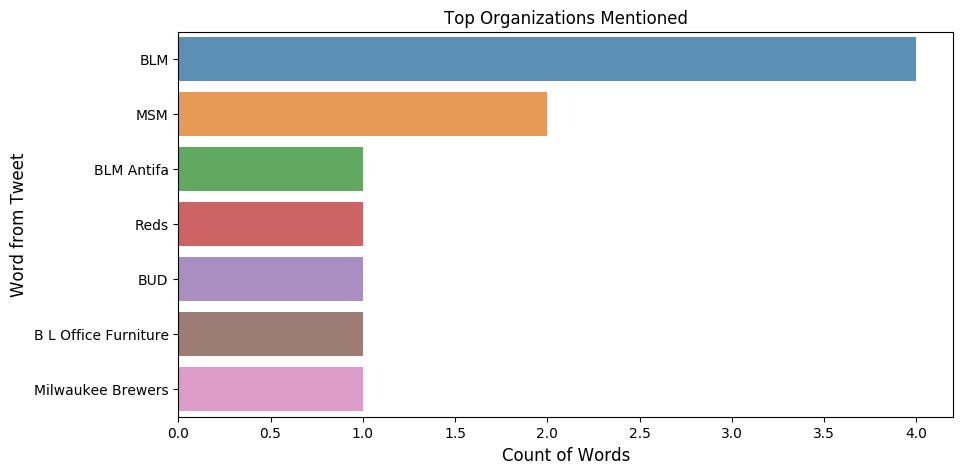

In [30]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [31]:
str1 = " " 
stem2 = str1.join(lines_2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

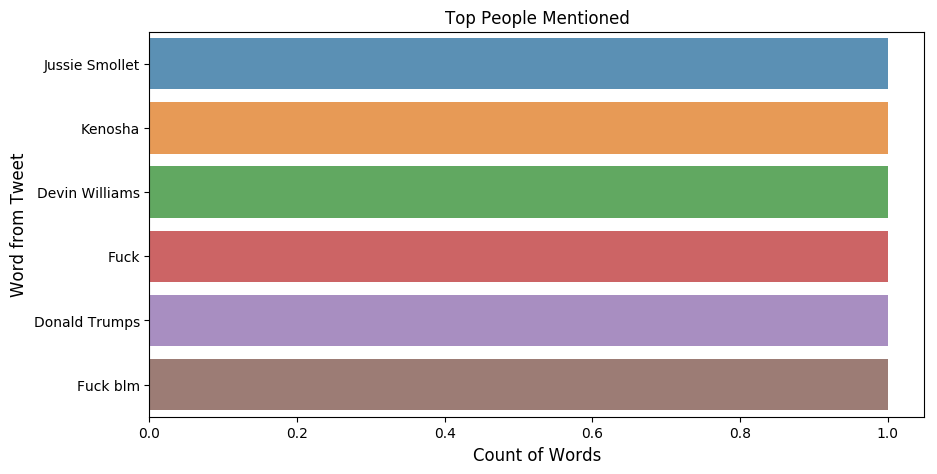

In [32]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()